## Clustering

Надо найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$


In [1]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [5]:
summ = []
for i in range(len(clust)):
    num = (clust[i][0] - centroid[0])**2 + (clust[i][1] - centroid[1])**2
    summ.append(num)

In [7]:
sum(summ)

16.31211696438564



Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [10]:
import pickle
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
x = data_clustering['X']

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans_model = kmeans.fit(x)

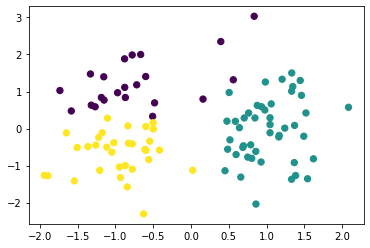

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], s=40, marker='o', c=kmeans_model.labels_)
plt.show()



Попробуйте применить эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

In [68]:
kmeans_model_1 = KMeans(n_clusters=2, init = 'k-means++', n_init=1, random_state=None, algorithm='full', max_iter=2)
cluster_centers = []

for i in range(10):
    model = kmeans_model_1.fit(x)
    centroid = model.cluster_centers_
    cluster_centers.append(centroid)

C:\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

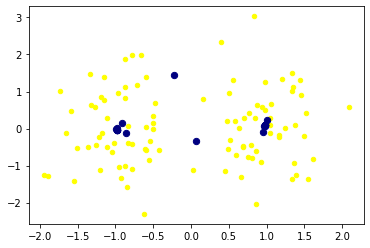

In [69]:
cluster_centers = [list(center) for centers in cluster_centers for center in centers]
cluster_centers = np.array(cluster_centers)
plt.scatter(x[:, 0], x[:, 1], s=20, marker='o', c='yellow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=40, marker='o', c='navy')
plt.show()